In [5]:
import pandas as pd
import numpy as np
from skmultilearn.model_selection import iterative_train_test_split
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from collections import Counter
import matplotlib.pyplot as plt

In [7]:
originalDf = pd.read_csv("../original_dataset/annotations/image_labels_test.csv")
#originalDf = originalDf.drop(["rad_id"], axis = 1)
originalDf = originalDf.groupby("image_id").max().reset_index() #as combined

originalDf.describe()

,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,ILD,...,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion,COPD,Lung tumor,Pneumonia,Tuberculosis,Other disease,No finding
count,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000,...,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000
mean,0.073333,0.028667,0.064667,0.10300,0.000667,0.032000,0.0,0.001000,0.002667,0.073667,...,0.00600,0.072333,0.003667,0.031333,0.000667,0.026667,0.08200,0.054667,0.219000,0.683667
std,0.260726,0.166896,0.245978,0.30401,0.025816,0.176029,0.0,0.031612,0.051579,0.261271,...,0.07724,0.259082,0.060452,0.174246,0.025816,0.161134,0.27441,0.227366,0.413638,0.465122
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [20]:
X = originalDf.index.values.reshape(-1,1)
X

#trainDf = originalDf.drop(["COPD","Lung tumor","Pneumonia","Tuberculosis","Other diseases","No finding"], axis = 1)
originalDf = originalDf.drop(["COPD","Lung tumor","Pneumonia","Tuberculosis","Other disease","No finding"], axis = 1)
y = originalDf.drop(["image_id"], axis = 1)
y = y.values

y = np.asmatrix(y)
print(np.shape(y))

(3000, 22)


In [21]:
Counter(combination for row in get_combination_wise_output_matrix(y.A, order=2) for combination in row)

Counter({(np.int64(3), np.int64(3)): 309,
         (np.int64(9), np.int64(9)): 221,
         (np.int64(0), np.int64(0)): 220,
         (np.int64(19), np.int64(19)): 217,
         (np.int64(2), np.int64(2)): 194,
         (np.int64(15), np.int64(15)): 176,
         (np.int64(17), np.int64(17)): 169,
         (np.int64(16), np.int64(16)): 111,
         (np.int64(5), np.int64(5)): 96,
         (np.int64(21), np.int64(21)): 94,
         (np.int64(0), np.int64(3)): 93,
         (np.int64(1), np.int64(1)): 86,
         (np.int64(11), np.int64(11)): 84,
         (np.int64(17), np.int64(19)): 82,
         (np.int64(2), np.int64(3)): 72,
         (np.int64(3), np.int64(9)): 62,
         (np.int64(10), np.int64(10)): 58,
         (np.int64(15), np.int64(19)): 57,
         (np.int64(0), np.int64(2)): 50,
         (np.int64(9), np.int64(19)): 50,
         (np.int64(9), np.int64(15)): 48,
         (np.int64(2), np.int64(19)): 43,
         (np.int64(1), np.int64(16)): 42,
         (np.int64(0), np.i

In [22]:
np.random.seed(1243)
X_test, y_test, X_val, y_val = iterative_train_test_split(X, y, test_size = 0.5)

In [23]:
pd.DataFrame({
    'test': Counter(str(combination) for row in get_combination_wise_output_matrix(y_test.A, order=2) for combination in row),
    'val' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_val.A, order=2) for combination in row)
}).T.fillna(0.0)

,"(np.int64(2), np.int64(2))","(np.int64(3), np.int64(3))","(np.int64(19), np.int64(19))","(np.int64(15), np.int64(19))","(np.int64(15), np.int64(15))","(np.int64(2), np.int64(19))","(np.int64(2), np.int64(3))","(np.int64(3), np.int64(19))","(np.int64(0), np.int64(3))","(np.int64(0), np.int64(0))",...,"(np.int64(1), np.int64(12))","(np.int64(11), np.int64(12))","(np.int64(2), np.int64(12))","(np.int64(12), np.int64(21))","(np.int64(2), np.int64(20))","(np.int64(10), np.int64(20))","(np.int64(0), np.int64(14))","(np.int64(3), np.int64(18))","(np.int64(16), np.int64(20))","(np.int64(1), np.int64(20))"
test,97.0,154.0,108.0,29.0,88.0,22.0,36.0,12.0,47.0,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
val,97.0,155.0,109.0,28.0,88.0,21.0,36.0,11.0,46.0,110.0,...,1.0,1.0,1.0,1.0,3.0,2.0,3.0,1.0,2.0,1.0


In [24]:
testSplit = originalDf.loc[X_test.flatten()]
valSplit = originalDf.loc[X_val.flatten()]

In [25]:
testSplit

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,...,Lung cavity,Lung cyst,Mediastinal shift,Nodule/Mass,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion
0,002a34c58c5b758217ed1f584ccbcfe9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,004f33259ee4aef671c2b95d54e4be68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,008bdde2af2462e86fd373a445d0f4cd,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,009bc039326338823ca3aa84381f17f1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,011295e0bcdc7636569ab73bfdcc4450,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,ff41bdfc0c7fae671caabbe6dcf071bb,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,ff9fcc4087ed5e941209aa3fa948e364,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,ffaa288c8abca300974f043b57d81521,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2998,ffc441e0c8b7153844047483a577e7c3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
valSplit

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,...,Lung cavity,Lung cyst,Mediastinal shift,Nodule/Mass,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion
4,00a2145de1886cb9eb88869c85d74080,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,00b7e6bfa4dc1fe9ddd0ce74743e38c2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21,0291515f5d14c34180a15712a55bf7bd,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,02b0ad6e22487b7e3f08093c42444b0f,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
23,02d04b6b6883fd92c12a3dde5d2ff6c0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,ff490fbf2d5613bc7c8cc13e2c2b1901,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2992,ff5b2414a7b94c78bb0073e656eb9c0e,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2993,ff761085c11792ec5f439f6b74774550,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2994,ff8d249021841a1af6f721db80550228,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


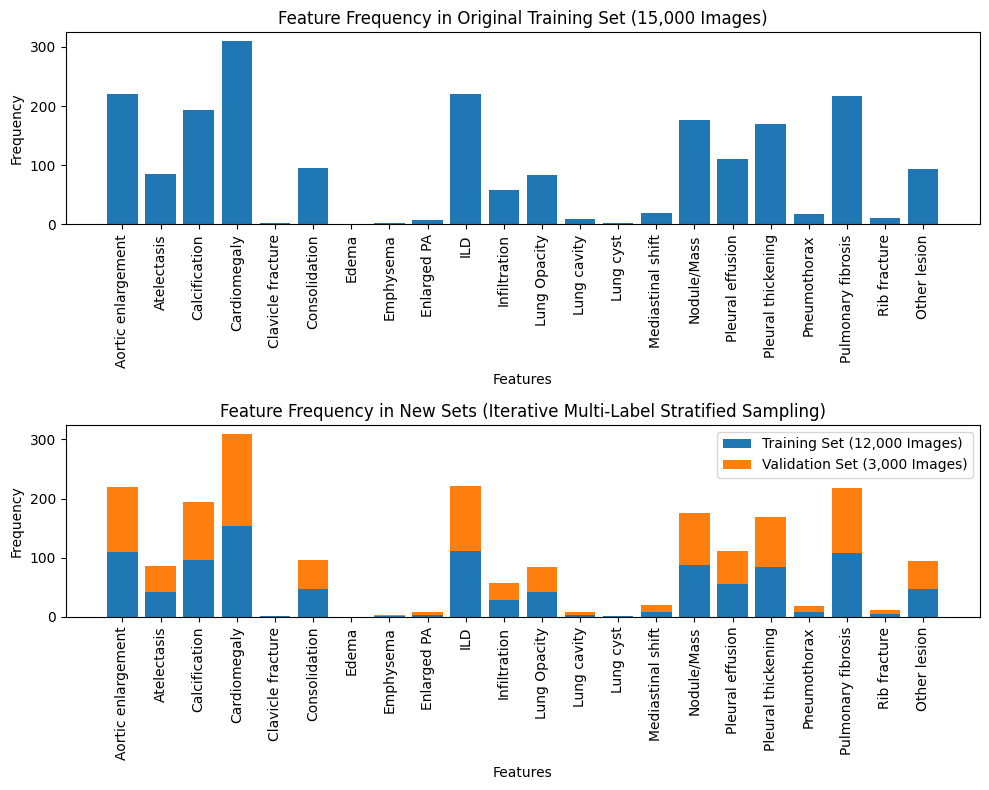

In [27]:
original_freq = originalDf.drop("image_id", axis = 1).sum()

test_freq = testSplit.drop("image_id", axis = 1).sum()

# Calculate the frequency of each feature in the validation set
val_freq = valSplit.drop("image_id", axis = 1).sum()

# Plot the bar charts
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Original df bar chart
axes[0].bar(original_freq.index, original_freq.values)
axes[0].set_title('Feature Frequency in Original Training Set (15,000 Images)')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=90)

# Training set bar chart
axes[1].bar(test_freq.index, test_freq.values)
axes[1].set_title('Feature Frequency in New Sets (Iterative Multi-Label Stratified Sampling)')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=90)

# Validation set bar chart
axes[1].bar(val_freq.index, val_freq.values, bottom = test_freq.values)
axes[1].tick_params(axis='x', rotation=90)

axes[1].legend(["Training Set (12,000 Images)", "Validation Set (3,000 Images)"])

plt.tight_layout()
plt.savefig("TrainValDistribution.pdf")
plt.show()

In [28]:
print(pd.DataFrame(zip(original_freq.index,original_freq, test_freq, val_freq)))

                     0    1    2    3
0   Aortic enlargement  220  110  110
1          Atelectasis   86   43   43
2        Calcification  194   97   97
3         Cardiomegaly  309  154  155
4    Clavicle fracture    2    2    0
5        Consolidation   96   48   48
6                Edema    0    0    0
7            Emphysema    3    2    1
8          Enlarged PA    8    4    4
9                  ILD  221  111  110
10        Infiltration   58   29   29
11        Lung Opacity   84   42   42
12         Lung cavity    9    4    5
13           Lung cyst    2    1    1
14   Mediastinal shift   20    9   11
15         Nodule/Mass  176   88   88
16    Pleural effusion  111   56   55
17  Pleural thickening  169   84   85
18        Pneumothorax   18    8   10
19  Pulmonary fibrosis  217  108  109
20        Rib fracture   11    5    6
21        Other lesion   94   47   47


In [173]:
testSplit.to_csv("image_labels_trainNEW.csv", index = None)
valSplit.to_csv("image_labels_valNEW.csv", index = None)

In [175]:
print(testSplit[testSplit["image_id"].isin(list(valSplit["image_id"]))])
print(valSplit[valSplit["image_id"].isin(list(testSplit["image_id"]))])

#we know that there is no overlap of images

Empty DataFrame
Columns: [image_id, Aortic enlargement, Atelectasis, Calcification, Cardiomegaly, Clavicle fracture, Consolidation, Edema, Emphysema, Enlarged PA, ILD, Infiltration, Lung Opacity, Lung cavity, Lung cyst, Mediastinal shift, Nodule/Mass, Pleural effusion, Pleural thickening, Pneumothorax, Pulmonary fibrosis, Rib fracture, Other lesion]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [image_id, Aortic enlargement, Atelectasis, Calcification, Cardiomegaly, Clavicle fracture, Consolidation, Edema, Emphysema, Enlarged PA, ILD, Infiltration, Lung Opacity, Lung cavity, Lung cyst, Mediastinal shift, Nodule/Mass, Pleural effusion, Pleural thickening, Pneumothorax, Pulmonary fibrosis, Rib fracture, Other lesion]
Index: []

[0 rows x 23 columns]
